In [113]:
import pandas as pd 
import numpy as np
import re
import datetime as dt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


In [66]:
# One entry per company
companies_df = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/companies.csv')
rounds_df = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/rounds.csv')

In [14]:
companies_df.shape

(66368, 14)

In [12]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
permalink            66368 non-null object
name                 66367 non-null object
homepage_url         61310 non-null object
category_list        63220 non-null object
funding_total_usd    66368 non-null object
status               66368 non-null object
country_code         59410 non-null object
state_code           57821 non-null object
region               58338 non-null object
city                 58340 non-null object
funding_rounds       66368 non-null int64
founded_at           51147 non-null object
first_funding_at     66344 non-null object
last_funding_at      66368 non-null object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


### Data Cleaning 

In [16]:
## Dropping rows with no name  

clean_companies = companies_df.dropna(subset=['name'])
clean_companies.shape

(66367, 14)

In [18]:
## Drropping values with no funding date 

clean_companies = clean_companies.dropna(subset=['first_funding_at'])
clean_companies.shape

(66343, 14)

In [19]:
#Dropping homepage_url 
clean_companies.drop(axis=1, columns=['homepage_url'], inplace=True)

In [125]:
# Fill empty country with 'unknown'
clean_companies.country_code.fillna('unknown', inplace=True)

Text(0.5,1,'Total Region Wise Distribution')

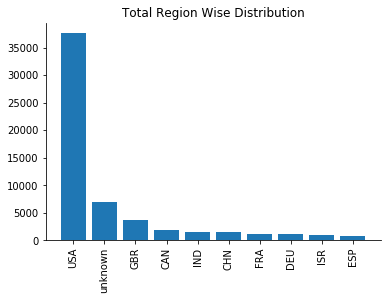

In [130]:
#Total country wise distribution 
country_dist = clean_companies.groupby(
    'country_code').size().sort_values(ascending=False)
plt.bar(country_dist[0:10].index, height=country_dist[0:10].values)
plt.xticks(rotation=90)
sns.despine()
plt.title('Total Region Wise Distribution')

In [23]:
# Removing non sensical dates
clean_companies = clean_companies[
    clean_companies.first_funding_at.str.match(r'(19)|(20)')]
clean_companies = clean_companies[
    clean_companies.last_funding_at.str.match(r'(19)|(20)')]
clean_companies.shape

(66338, 13)

In [34]:
clean_companies.first_funding_at = pd.to_datetime(
    clean_companies.loc[:, 'first_funding_at'])
clean_companies.last_funding_at = pd.to_datetime(
    clean_companies.loc[:, 'last_funding_at'])
clean_companies.shape

(66338, 13)

In [28]:
# '-' -> NaNs 
clean_companies.funding_total_usd.replace('-', np.nan, inplace=True)

In [29]:
# conversting funding_total_usd, funding_rounds  from object -> number 

clean_companies.funding_total_usd = pd.to_numeric(
    clean_companies.loc[:, 'funding_total_usd'])

clean_companies.funding_rounds = pd.to_numeric(
    clean_companies.loc[:, 'funding_rounds'])


In [30]:
clean_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66338 entries, 0 to 66367
Data columns (total 13 columns):
permalink            66338 non-null object
name                 66338 non-null object
category_list        63191 non-null object
funding_total_usd    53555 non-null float64
status               66338 non-null object
country_code         59383 non-null object
state_code           57794 non-null object
region               58311 non-null object
city                 58313 non-null object
funding_rounds       66338 non-null int64
founded_at           51122 non-null object
first_funding_at     66338 non-null object
last_funding_at      66338 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 7.1+ MB


In [132]:
# Operating companies older than 2 years ago 
operating_countries = clean_companies[np.logical_and(
    np.logical_and(clean_companies.last_funding_at < pd.to_datetime('2013'),
                   clean_companies.first_funding_at > '2005'),
    clean_companies.status == 'operating')]

In [133]:
operating_countries

,permalink,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
3,/organization/0-6-com,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
12,/organization/1-800-dentist,1-800-DENTIST,Health and Wellness,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,2010-08-19,2010-08-19
13,/organization/1-800-doctors,1-800-DOCTORS,Health and Wellness,1750000.0,operating,USA,NJ,Newark,Iselin,1,1984-01-01,2011-03-02,2011-03-02
17,/organization/10-20-media,10-20 Media,E-Commerce,2050000.0,operating,USA,MD,Baltimore,Woodbine,4,2001-01-01,2009-06-18,2011-12-28
19,/organization/1000-corks,1000 Corks,Search,40000.0,operating,USA,OR,"Portland, Oregon",Lake Oswego,1,2008-01-01,2011-08-23,2011-08-23
21,/organization/1000chi,Beijing 1000CHI Software Technology,Mobile,43923865.0,operating,unknown,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
28,/organization/100du-tv,100du.tv,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,2,NaN,2008-01-07,2010-08-13
29,/organization/100e-com,100e.com,Education,4500000.0,operating,CHN,22,Beijing,Beijing,2,NaN,2006-01-01,2006-09-01
37,/organization/10seconds-software,10seconds Software,Enterprise Software|Mobility|Software,100000.0,operating,AUS,2,Sydney,Sydney,1,2009-07-01,2010-07-01,2010-07-01


Text(0.5,1,'Operating Companies- Region Wise Distribution')

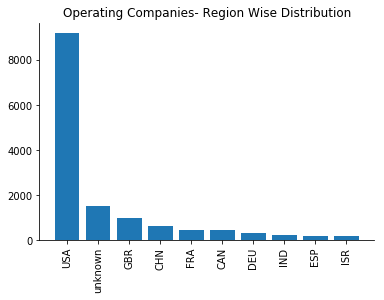

In [134]:
#Country wise distribution/ Operating Countries  
country_dist = operating_countries.groupby(
    'country_code').size().sort_values(ascending=False)
plt.bar(country_dist[0:10].index, height=country_dist[0:10].values)
plt.xticks(rotation=90)
sns.despine()
plt.title('Operating Companies- Region Wise Distribution')

In [37]:
current_date =clean_companies.last_funding_at.max()

In [38]:
current_date

Timestamp('2015-12-12 00:00:00')

In [85]:
# non operating companies 
no_companies = clean_companies[np.logical_and(
    np.logical_and(clean_companies.last_funding_at < pd.to_datetime('2013'),
                   clean_companies.first_funding_at > '2005'),
    clean_companies.status != 'operating')]

In [86]:
no_companies

,permalink,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
20,/organization/1000-markets,1000 Markets,Art|E-Commerce|Marketplaces,5.000000e+05,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,Curated Web,2.535000e+06,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,Analytics,1.250000e+06,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,Software,3.500000e+07,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
34,/organization/10bestthings,10BestThings,Curated Web,5.000000e+04,closed,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04-01,2009-04-01
47,/organization/11i-solutions,11i Solutions,Enterprise Software,1.800000e+06,closed,USA,AL,Huntsville,Huntsville,1,NaN,2011-03-22,2011-03-22
58,/organization/123people,yelster digital gmbh (former 123people),Local Search|Software|Web Design,NaN,acquired,AUT,9,Vienna,Vienna,1,2007-01-01,2008-01-01,2008-01-01
64,/organization/12society,12Society,E-Commerce,NaN,acquired,USA,CA,Los Angeles,West Hollywood,1,2012-01-01,2012-04-05,2012-04-05
67,/organization/13th-lab,13th Lab,Augmented Reality|Computer Vision|Games|iPad|M...,7.000000e+05,acquired,SWE,26,Stockholm,Stockholm,1,2010-01-01,2012-06-15,2012-06-15
76,/organization/169-st,169 ST.,Entertainment|Games,5.000000e+04,closed,USA,FL,Orlando,Lake Mary,1,2009-05-15,2009-06-01,2009-06-01


In [87]:
#Closed =1, ipo, accquired = 1 
no_companies['Result'] = np.nan

no_companies.loc[no_companies.status == 'closed', 'Result'] = 0
no_companies.loc[np.logical_or(
    no_companies.status == 'ipo', no_companies.status
    == 'acquired'), 'Result'] = 1

/Users/rohitsaluja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rohitsaluja/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [88]:
no_companies = no_companies.reset_index()

In [98]:
no_companies = no_companies.drop('index', 1)

In [99]:
no_companies 

,permalink,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Result,cat_list
0,/organization/1000-markets,1000 Markets,Art|E-Commerce|Marketplaces,5.000000e+05,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,1.0,"[Art, E-Commerce, Marketplaces]"
1,/organization/1000memories,1000memories,Curated Web,2.535000e+06,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,1.0,[Curated Web]
2,/organization/100plus,100Plus,Analytics,1.250000e+06,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30,1.0,[Analytics]
3,/organization/1010data,1010data,Software,3.500000e+07,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08,1.0,[Software]
4,/organization/10bestthings,10BestThings,Curated Web,5.000000e+04,closed,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04-01,2009-04-01,0.0,[Curated Web]
5,/organization/11i-solutions,11i Solutions,Enterprise Software,1.800000e+06,closed,USA,AL,Huntsville,Huntsville,1,NaN,2011-03-22,2011-03-22,0.0,[Enterprise Software]
6,/organization/123people,yelster digital gmbh (former 123people),Local Search|Software|Web Design,NaN,acquired,AUT,9,Vienna,Vienna,1,2007-01-01,2008-01-01,2008-01-01,1.0,"[Local Search, Software, Web Design]"
7,/organization/12society,12Society,E-Commerce,NaN,acquired,USA,CA,Los Angeles,West Hollywood,1,2012-01-01,2012-04-05,2012-04-05,1.0,[E-Commerce]
8,/organization/13th-lab,13th Lab,Augmented Reality|Computer Vision|Games|iPad|M...,7.000000e+05,acquired,SWE,26,Stockholm,Stockholm,1,2010-01-01,2012-06-15,2012-06-15,1.0,"[Augmented Reality, Computer Vision, Games, iP..."
9,/organization/169-st,169 ST.,Entertainment|Games,5.000000e+04,closed,USA,FL,Orlando,Lake Mary,1,2009-05-15,2009-06-01,2009-06-01,0.0,"[Entertainment, Games]"


In [100]:
no_companies.Result.value_counts()

1.0    3678
0.0    3516
Name: Result, dtype: int64

In [101]:
# no funding info 
no_companies.funding_total_usd.isna().sum()

1161

### Rounds 

In [102]:
rounds_df.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [103]:
### Category of companies that got shut down 

# Fill empty category with 'unknown'
no_companies .category_list.fillna('unknown', inplace=True)

In [104]:
# Create column with list of categories
no_companies[
    'cat_list'] = no_companies.category_list.apply(str.split,
                                                                sep='|')

In [105]:
no_companies.head()

,permalink,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Result,cat_list
0,/organization/1000-markets,1000 Markets,Art|E-Commerce|Marketplaces,500000.0,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,1.0,"[Art, E-Commerce, Marketplaces]"
1,/organization/1000memories,1000memories,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,1.0,[Curated Web]
2,/organization/100plus,100Plus,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30,1.0,[Analytics]
3,/organization/1010data,1010data,Software,35000000.0,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08,1.0,[Software]
4,/organization/10bestthings,10BestThings,Curated Web,50000.0,closed,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04-01,2009-04-01,0.0,[Curated Web]


In [107]:
failed_companies = no_companies.loc[no_companies['Result'] == 0.0]

### Failed Feature Categories 

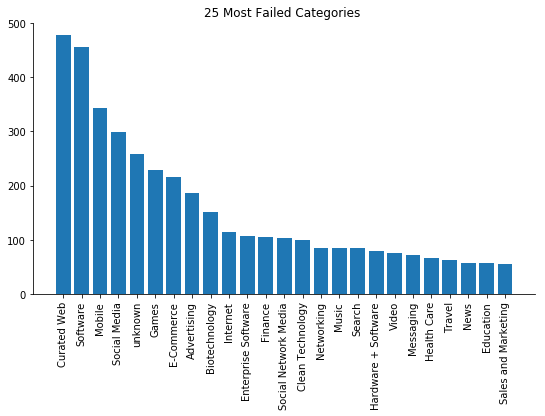

In [120]:
# Create list of category lists
categories = list(failed_companies.cat_list)
# Flatten the list
flat_categories = [cat for sublist in categories for cat in sublist]
# Count occurences of each
category_counts = Counter(flat_categories).most_common()
# Look at the distribution
plt.figure(figsize=(9, 5))
plt.bar([x[0] for x in category_counts[0:25]],
        [x[1] for x in category_counts[0:25]],
        width=0.8)
plt.xticks(rotation=90)
plt.title('25 Most Failed Categories ')
sns.despine()

### Successful Feature Categories 


In [116]:
successful_companies = no_companies.loc[no_companies['Result'] == 1.0]

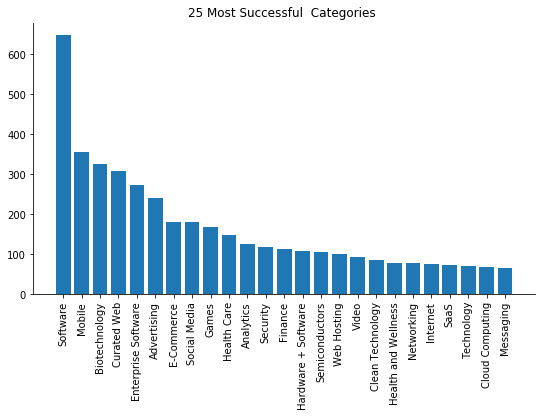

In [121]:
# Create list of category lists
categories = list(successful_companies.cat_list)
# Flatten the list
flat_categories = [cat for sublist in categories for cat in sublist]
# Count occurences of each
category_counts = Counter(flat_categories).most_common()
# Look at the distribution
plt.figure(figsize=(9, 5))
plt.bar([x[0] for x in category_counts[0:25]],
        [x[1] for x in category_counts[0:25]],
        width=0.8)
plt.xticks(rotation=90)
plt.title('25 Most Successful  Categories ')
sns.despine()

### Top Startup Locations 


In [123]:
# Fill empty country with 'unknown'
no_companies.country_code.fillna('unknown', inplace=True)

Text(0.5,1,'Succeeded/Failed Companies - Region Wise Distribution')

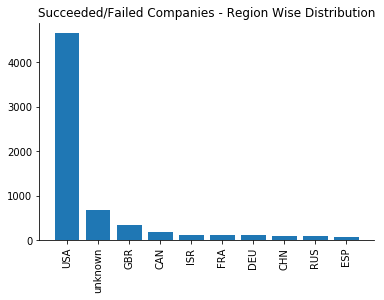

In [131]:
#Country wise distribution/ no operating companies 
country_dist = no_companies.groupby(
    'country_code').size().sort_values(ascending=False)
plt.bar(country_dist[0:10].index, height=country_dist[0:10].values)
plt.xticks(rotation=90)
sns.despine()
plt.title('Succeeded/Failed Companies - Region Wise Distribution')